In [40]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns
%matplotlib inline

# Build dataframe with data for plotting

$\phi_{i} (x) = exp\left( \frac{-1}{0.5} (x-m_i)^2 \right)$

In [49]:
# Generate rbf
x = np.arange(-2, 5, 0.01)
df=pd.DataFrame(data=x, columns=['x'])
df['0']=np.exp(-1/0.5*(x)**2)
df.set_index('x', inplace=True)
df.head()

,0
x,
-2.00,0.000335
-1.99,0.000363
-1.98,0.000393
-1.97,0.000426
-1.96,0.000460


In [57]:
## make 4 more radial functions, with different m 
for i in range(1,5):
    df[str(i)] = np.exp(-1/0.5*(x-i)**2)

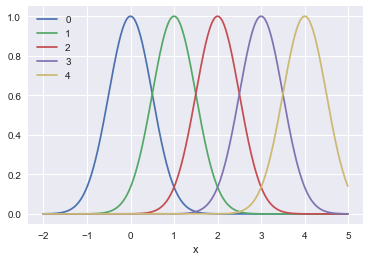

In [58]:
df.plot();

# Use case in pattern learning 
Assuming $\alpha=1$, then 

$\phi_{i} (x) = exp\left( \frac{-1}{2} (x-m_i)^2 \right)$

In [67]:
# Generate rbf
x = np.arange(0, 12, 0.01)
df=pd.DataFrame(index=x)
#df['0']=np.exp(-1/0.5*(x)**2)
#df.set_index('x', inplace=True)
df.columns

Index([], dtype='object')

In [61]:
np.cos(0)

1.0